# Problema das N-Rainhas com Hill-Climbing

Dependencias

In [ ]:
%pip install matplotlib

Importações de bibliotecas

In [1]:
import random
import time
from matplotlib import patches, pyplot as plt
import numpy as np

Algoritmo do Hill-Climbing

In [2]:
# Variável global para guarda o histórico de ataques
attack_history = []

def calcular_ataques(estado):
    ataques = 0
    for i in range(len(estado)):
        for j in range(i + 1, len(estado)):
            if estado[i] == estado[j] or abs(estado[i] - estado[j]) == j - i:
                ataques += 1
    return ataques

def gerar_estado_inicial(N):
    return [random.randint(0, N - 1) for _ in range(N)]

def hill_climb_N_queens(N):
    global attack_history
    inicio = time.time()
    estado_atual = gerar_estado_inicial(N)
    melhor_ataques = calcular_ataques(estado_atual)
    attack_history.append(melhor_ataques)
    total_iteracoes = 0
    
    while melhor_ataques > 0:
        melhor_vizinho = None
        
        for coluna in range(N):
            for linha in range(N):
                if estado_atual[coluna] != linha:
                    estado_vizinho = list(estado_atual)
                    estado_vizinho[coluna] = linha
                    ataques_vizinho = calcular_ataques(estado_vizinho)
                    
                    if ataques_vizinho < melhor_ataques:
                        melhor_vizinho = estado_vizinho
                        melhor_ataques = ataques_vizinho
                        total_iteracoes += 1
        
        if melhor_vizinho is None:
            break
        
        estado_atual = melhor_vizinho
        attack_history.append(melhor_ataques)
    fim = time.time()
    return estado_atual, (fim - inicio), total_iteracoes

Funções para mostrar a solução e o mapa do número de ataques

In [3]:
def plot_attacks(attack_history, N):
    plt.plot(attack_history)
    plt.xlabel('Iterações totais dos melhores vizinhos')
    plt.ylabel('Número de Ataques dos melhores vizinhos')
    plt.title(f'Variação do Número de Ataques durante as Execuções com N = {N}')
    plt.grid(True)
    plt.show()
    
def plot_solution(solution, N):
    fig = plt.figure()
    #fig.set_size_inches(20, 20)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, N))
    ax.set_ylim((0, N))

    # Adicionar quadriculado
    for i in range(N):
        for j in range(N):
            color = 'white' if (i + j) % 2 == 0 else 'black'
            ax.add_patch(patches.Rectangle((j, i), 1, 1, color=color))
    
    count = 0
    for queen in solution:
        ax.add_patch(patches.Circle((queen + 0.5, count + 0.5), radius=0.4, fill=True, color='red'))
        count += 1
    plt.show()

# Main

In [7]:
if __name__ == '__main__':
    # Exemplo de uso:
    N = 32 # Número de rainhas e tamanho do tabuleiro
    rodadas = 5
    conflitos_tot = []
    attack_history = []

    for _ in range(rodadas):
        print(f'======== RODADA {_} ========')
        solucao, tempo, iteracoes = hill_climb_N_queens(N)
        conflitos = calcular_ataques(solucao)
        conflitos_tot.append(conflitos)
        min = int(tempo/60)
        sec = float(tempo%60)
        print(f'Conflitos: {conflitos}')
        print(f'Tempo -> {min} m {sec} s')
        print(f'Total de iterações: {iteracoes}')
        print(f'============================\n')

    qualidade_solucoes = sum(conflitos_tot) / rodadas
    print('QUALIDADE DAS SOLUCOES ', qualidade_solucoes)

======== RODADA 0 ========
Conflitos: 3
Tempo -> 0 m 1.5524306297302246 s
Total de iterações: 32

======== RODADA 1 ========
Conflitos: 4
Tempo -> 0 m 1.5108792781829834 s
Total de iterações: 38

======== RODADA 2 ========
Conflitos: 3
Tempo -> 0 m 1.8226408958435059 s
Total de iterações: 41

======== RODADA 3 ========
Conflitos: 4
Tempo -> 0 m 1.1937592029571533 s
Total de iterações: 32

======== RODADA 4 ========
Conflitos: 5
Tempo -> 0 m 1.352985143661499 s
Total de iterações: 34

QUALIDADE DAS SOLUCOES  3.8


Mostra graficamente os resultados

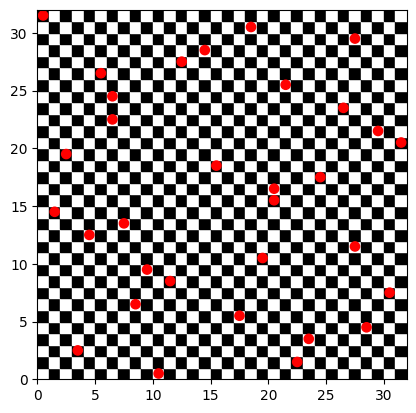

In [8]:
# Plot da solução encontrada no tabuleiro
plot_solution(solution=solucao, N=N)

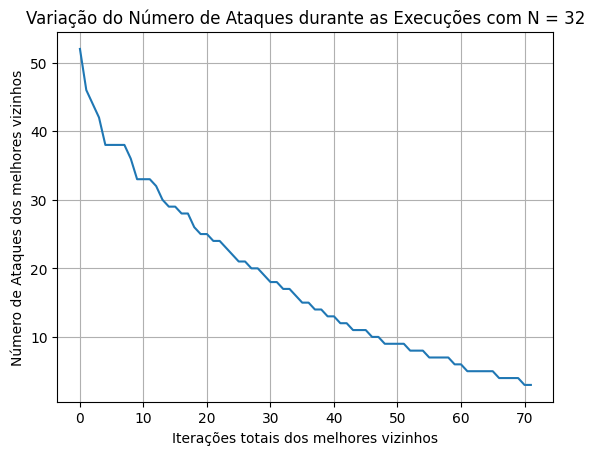

In [11]:
# Plot da variação dos ataques durante a execução
atk = np.sort(attack_history)[::-1]
plot_attacks(atk, N)